In [1]:
#Importing necessary libraries
import sympy as sym
from sympy.abc import x
from scipy.integrate import quad
from math import sin, cos, tan, log, e, pi
import numpy as np
from random import randint
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Taking input from user
func = input('Enter the function: ')
function = sym.lambdify(x, func)
init_point = int(input('Enter the start of the interval: '))
end_point = int(input('Enter the end of the interval: '))

In [5]:
#Function code
def Simpsons_method(function:str, init_point:int, end_point:int)->str:
    def find_polynomial(x1, x2, x3, y1, y2, y3):
        a = (x1*(y3-y2) + x2*(y1-y3) + x3*(y2-y1))/((x1-x2)*(x1-x3)*(x2-x3))
        b = ((y2-y1)/(x2-x1)) - a*(x1+x2)
        c = y1 - a*x1**2 - b*x1
        return sym.lambdify(x, sym.sympify('{}*x**2 + {}*x + {}'.format(a, b, c)))
    n = randint(5, 50)
    if n % 2 != 0:
        n += 1
    x_val = np.linspace(init_point, end_point, n+1)
    dx = (end_point-init_point)/n
    Area = 0
    for i in range(0, len(x_val)-2, 2):
        x_1, x_2, x_3 = x_val[i], x_val[i+1], x_val[i+2] 
        pol_func = find_polynomial(x_1, x_2, x_3, function(x_1), function(x_2), function(x_3))
        Area += quad(pol_func ,x_1, x_3)[0]
        
    return str(Area)   


Simpsons_method(function, init_point, end_point)


'1.4161468770117984'

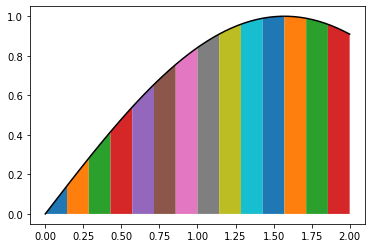

In [6]:
#function Graph
def Simpsons_method_graph(function,init_point,end_point):
    array = np.linspace(init_point, end_point, 50)
    plt.plot(array, function(array), color='black')
    n = randint(5, 50)
    if n % 2 != 0:
        n += 1
    x_val = np.linspace(init_point, end_point, n+1)
    area_of_parab = 0
    def find_polynomial(x1, x2, x3, y1, y2, y3):
      a = (x1*(y3-y2) + x2*(y1-y3) + x3*(y2-y1))/((x1-x2)*(x1-x3)*(x2-x3))
      b = ((y2-y1)/(x2-x1)) - a*(x1+x2)
      c = y1 - a*x1**2 - b*x1
      return sym.lambdify(x, sym.sympify('{}*x**2 + {}*x + {}'.format(a, b, c)))

    for i in range(0, len(x_val)-2, 2):
      x_1, x_2, x_3 = x_val[i], x_val[i+1], x_val[i+2]
      pol_func = find_polynomial(x_1, x_2, x_3, function(x_1), function(x_2), function(x_3))
      area_of_parab += quad(pol_func ,x_1, x_3)[0]
      array = np.linspace(x_val[i], x_val[i+2], 50)
      plt.fill_between(array, pol_func(array)) 
      plt.savefig('Simpson_Method_Graph.png')
     

Simpsons_method_graph(function,init_point,end_point)